<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Segmentación de clientes

Crear un modelo de segmentación para la estimación de los tipos de clientes que van de compras a un shoping<br>
v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle"></div>

In [2]:
if os.access('Mall_Customers.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/Mall_Customers.csv > Mall_Customers.csv
    else:
        !wget Mall_Customers.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/Mall_Customers.csv

--2024-09-19 15:27:29--  http://mall_customers.csv/
Resolving mall_customers.csv (mall_customers.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘mall_customers.csv’
--2024-09-19 15:27:29--  https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3981 (3.9K) [text/plain]
Saving to: ‘Mall_Customers.csv’

Mall_Customers.csv  100%[===================>]   3.89K  --.-KB/s    in 0s      

2024-09-19 15:27:30 (54.1 MB/s) - ‘Mall_Customers.csv’ saved [3981/3981]

FINISHED --2024-09-19 15:27:30--
Total wall clock time: 0.5s
Downloaded: 1 files, 3.9K in 0s (54.1 MB/s)


### `Mall_Customers.csv`:
El dataset **`Mall_Customers.csv`** contiene datos sobre clientes que asisten al shopping a comprar, y sus características de consumo.<br>
[Dataset source](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)
- **CustomerID** --> id del comprador, ejemplo 5
- **Gender** --> género, masculino (Male) o femenino (female)
- **Age** --> edad
- **Annual Income** --> ingreso de dinero anual de la persona en miles de dolares
- **Spending socre** --> que tan gastador es la persona (de 1 a 100)

In [3]:
df = pd.read_csv("Mall_Customers.csv")

# Procesar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle"></div>

In [4]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Alumno: Los algoritmos de clustering no funcionan bien con las variables categóricas,
# obtener un nuevo dataset (df2) sin la columna CustomerID y Gender
df2 = df.copy ()
df2 = df2.drop(columns=['CustomerID', 'Gender'])
df2.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [6]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes

df2 = pd.read_csv("Mall_Customers.csv")
df2.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [7]:


df2 = pd.read_csv("Mall_Customers.csv")
df2.shape

(200, 5)

# Explorar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle"></div>

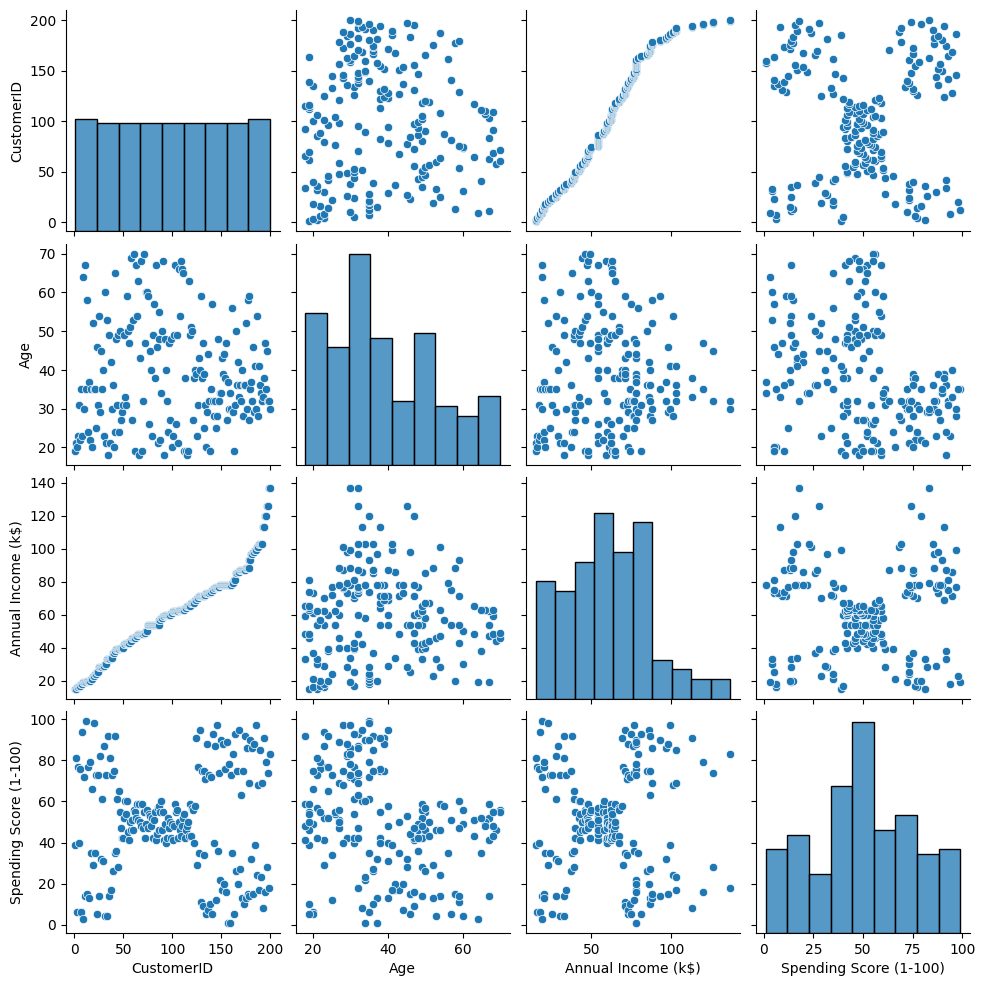

In [8]:


sns.pairplot(df2)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

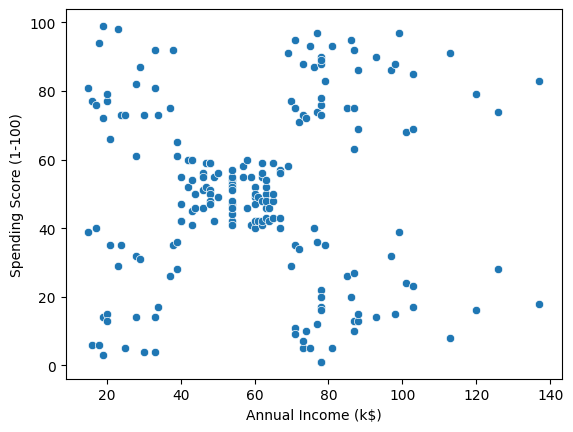

In [15]:
# Alumno: Se puede observar que donde se ve claramente una segmentación de grupos
# en en la relación de "Annual Income" y "Spending Socre"
# Graficar unicamente la relación x=Annual Income con y=SpendingScore
# con un scatter plot
sns.scatterplot(x=df2["Annual Income (k$)"], y=df2["Spending Score (1-100)"])




# Entrenar modelo
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle"></div>

In [27]:
# Almuno: Crear un numpy array "X" con los features de entrada (Annual Income y Spending Score)
X = df2[["Annual Income (k$)", "Spending Score (1-100)"]].values




#### Crear un modelo de segmentación con Kmeans
Parámetros
- n_clusters --> (k) número de clusters/grupos (defecto 5)
- init --> método utilizado para determianr donde comienzan los clusters
 - k-means++ --> mecanismo inteligente para determinar el comienzo (defecto)
 - random --> los centros se determinarn aleatoriamente
- max_iter --> cantidad de iteración (defecto 300)

In [29]:
# Almuno: Entrenar diferentes modelos de Kmeans en un rango de cluster (2, 10)
# Conservar el resultado de "inertial" para utilizar como métrica de selccion
from sklearn.cluster import KMeans
K = range(2, 10)
inertial = []

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertial.append(kmeans.inertia_)




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [30]:
# Dibujar la evolucion del error (inertia) y deteminar el
# punto de quiebre (elbow point) para deteminar el mejor k
inertia_df = pd.DataFrame({'K': K, 'inertia': inertial})
inertia_df.head()


,K,inertia
0,2,183257.861545
1,3,106348.373062
2,4,73679.789039
3,5,44448.455448
4,6,37239.835542


In [31]:

# Alumno: Entrenar el modelo con el mejor "K" encontrado
# y determinar los labels
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
labels = kmeans.labels_
labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

In [32]:
# Alumno: Sumar la columna de labels con el nombre de custseg (customer segmentation)
# a su dataset

labels.shape
df2["custseg"] = labels
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),custseg
0,1,Male,19,15,39,0
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,0


# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [33]:
# Alumno: Calcular la exactitud (accuracy) del modelo

from sklearn.metrics import accuracy_score
accuracy_score(df2["custseg"], labels)

1.0

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

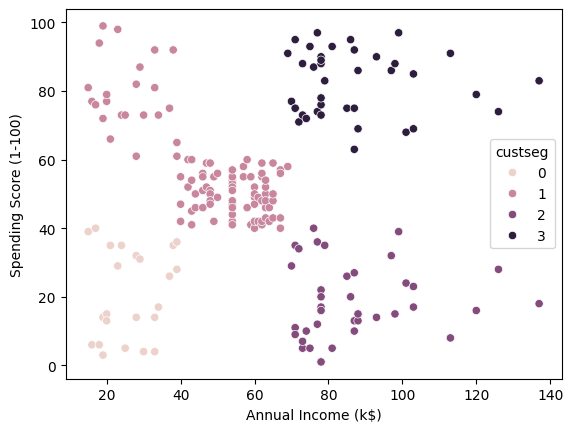

In [41]:
# Alumno: Volver a repetir el gráfico de scatter "Annual Income" y "Spending Socre"
# pero ahora coloreando con "hue" los puntos según su clase de custseg
# Alumno: Volver a repetir el gráfico de scatter "Annual Income" y "Spending Socre"
# pero ahora coloreando con "hue" los puntos según su clase de custseg

Annual_Income = df2["Annual Income (k$)"] # Use the correct column name 'Annual Income (k$)'
Spending_Score = df2["Spending Score (1-100)"] # Use the correct column name 'Spending Score (1-100)'
sns.scatterplot(x=df2["Annual Income (k$)"], y=df2["Spending Score (1-100)"], hue=df2["custseg"]) # Use the correct column names